## Perceptron Model Experiments

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

def show_results(path):
    with open(path) as f:
        history = json.load(f)
        show_stats(history)

def show_stats(history):
    duration = history["duration"]
    accuracy = history["accuracy"]
    loss = history["loss"]
    learning_rate = history["learning_rate"] if "learning_rate" in history else []
    config = history["config"]
    rounds = [i for i in range(1, len(duration) + 1)]
    
    print("Experiment configuration: {0}".format(config))
    
    
    if len(rounds) > 1:
        plt.title("Time vs. Communication Round")
        plt.xlabel("Communication Round")
        plt.ylabel("Time Spent")
        plt.plot(rounds, duration, 'b')
        plt.show()
    print("Total time spent: {0} seconds.".format(sum(duration)))
    print("Average time spent: {0} seconds.".format(sum(duration)/len(duration)))

    if len(rounds) > 1:
        plt.title("Validation Accuracy vs. Communication Round")
        plt.xlabel("Communication Round")
        plt.ylabel("Validation Accuracy")
        plt.plot(rounds, accuracy, 'g')
        plt.show()
    print("Best validation accuracy: {0} (round: {1})".format(max(accuracy), np.argmax(accuracy)+1))
    
    if len(rounds) > 1:
        plt.title("Validation Accuracy vs. Time")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Validation Accuracy")
        time = [t + sum(t2 for t2 in duration[:i]) for i, t in enumerate(duration)]
        plt.plot(time, accuracy, 'yellow')
        plt.show()

    if len(rounds) > 1:
        plt.title("Validation Loss vs. Communication Round")
        plt.xlabel("Communication Round")
        plt.ylabel("Validation Loss")
        plt.plot(rounds, loss, 'orange')
        plt.show()
    print("Best validation loss: {0} (round: {1})".format(min(loss), np.argmin(loss)+1))

    if len(rounds) > 1 and learning_rate:
        plt.title("Learning Rate vs. Communication Round")
        plt.xlabel("Communication Round")
        plt.ylabel("Learning Rate")
        plt.plot(rounds, learning_rate, 'purple')
        plt.show()

Experiment configuration: {}


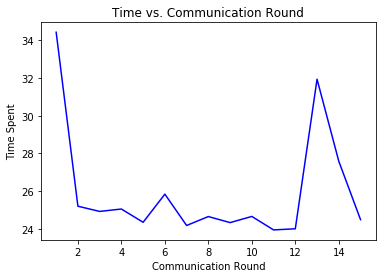

Total time spent: 389.51788854599 seconds.
Average time spent: 25.96785923639933 seconds.


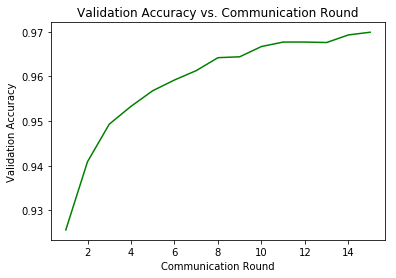

Best validation accuracy: 0.9699000120162964 (round: 15)


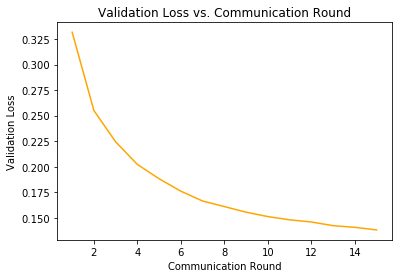

Best validation loss: 0.13822586834430695 (round: 15)


In [42]:
history1 = {"duration": [34.42507195472717, 25.196756839752197, 24.920186042785645, 25.047553062438965, 24.344563007354736, 25.83739709854126, 24.174979209899902, 24.648655891418457, 24.326737880706787, 24.65516471862793, 23.93942904472351, 24.00003695487976, 31.934197902679443, 27.581915140151978, 24.485243797302246], "accuracy": [0.925599992275238, 0.9409000277519226, 0.9492999911308289, 0.9532999992370605, 0.9567999839782715, 0.9592000246047974, 0.9613000154495239, 0.9642000198364258, 0.9643999934196472, 0.96670001745224, 0.9677000045776367, 0.9677000045776367, 0.9675999879837036, 0.9692999720573425, 0.9699000120162964], "loss": [0.3315559923648834, 0.25496920943260193, 0.22436878085136414, 0.2022583782672882, 0.1882251501083374, 0.17612329125404358, 0.16648338735103607, 0.16105788946151733, 0.15557126700878143, 0.15127968788146973, 0.1480933576822281, 0.14598295092582703, 0.14240257441997528, 0.14075374603271484, 0.13822586834430695], "global_step": [16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0], "config": {}}
show_stats(history1)

Experiment configuration: {'num_clients': 20, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.7, 'max_rounds': 25, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.0001, 'save_dir': './results/'}


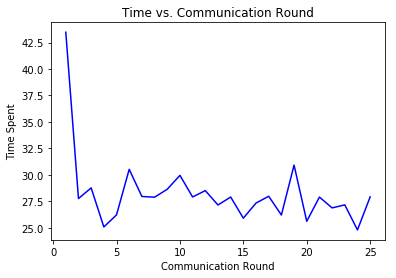

Total time spent: 706.2135474681854 seconds.
Average time spent: 28.248541898727417 seconds.


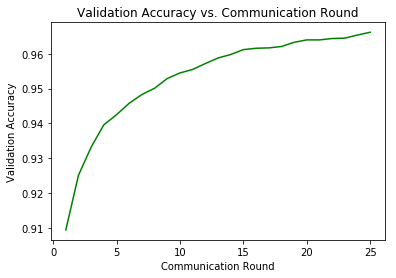

Best validation accuracy: 0.9661999940872192 (round: 25)


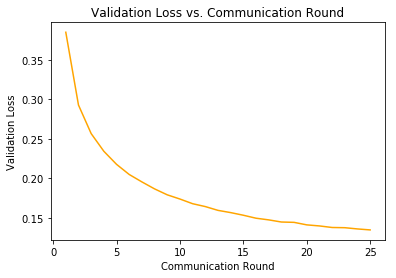

Best validation loss: 0.13449519872665405 (round: 25)


In [23]:
history2 = {"duration": [43.475143909454346, 27.75565004348755, 28.761032104492188, 25.070860147476196, 26.21071195602417, 30.517762899398804, 27.951002836227417, 27.883954286575317, 28.635060787200928, 29.948077917099, 27.904003143310547, 28.50630807876587, 27.147199392318726, 27.89915108680725, 25.898829221725464, 27.330145120620728, 27.969851970672607, 26.199697971343994, 30.91577911376953, 25.607776165008545, 27.894399881362915, 26.87148690223694, 27.156754732131958, 24.790474891662598, 27.91243290901184], "config": {"num_clients": 20, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.7, "max_rounds": 25, "batch_size": 50, "epochs": 10, "learning_rate": 0.0001, "save_dir": "./results/"}, "accuracy": [0.9093999862670898, 0.9251000285148621, 0.9332000017166138, 0.9395999908447266, 0.9424999952316284, 0.9458000063896179, 0.9483000040054321, 0.9501000046730042, 0.9528999924659729, 0.9545000195503235, 0.9555000066757202, 0.9571999907493591, 0.9588000178337097, 0.9598000049591064, 0.9611999988555908, 0.9616000056266785, 0.9617000222206116, 0.9621000289916992, 0.9632999897003174, 0.9639999866485596, 0.9639999866485596, 0.9643999934196472, 0.9645000100135803, 0.965399980545044, 0.9661999940872192], "loss": [0.3848270773887634, 0.29265251755714417, 0.25649920105934143, 0.23409080505371094, 0.21756024658679962, 0.2047029584646225, 0.19529998302459717, 0.18645894527435303, 0.17893017828464508, 0.1736062467098236, 0.1676875501871109, 0.16406208276748657, 0.15925420820713043, 0.15642131865024567, 0.1530861258506775, 0.14932043850421906, 0.14721164107322693, 0.14450101554393768, 0.14406436681747437, 0.14088663458824158, 0.13953882455825806, 0.13756625354290009, 0.13729646801948547, 0.13573578000068665, 0.13449519872665405], "global_step": [31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0]}
show_stats(history2)

In [33]:
history3 = {"duration": [31.937206029891968], "config": {"num_clients": 1, "model_type": "perceptron", "dataset_type": "iid", "fraction": 1.0, "max_rounds": 1, "batch_size": 50, "epochs": 10, "learning_rate": 0.0001, "save_dir": "./results/"}, "accuracy": [0.9733999967575073], "loss": [0.0878831148147583], "global_step": [56.0]}
show_stats(history3)

Experiment configuration: {'num_clients': 1, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 1.0, 'max_rounds': 1, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.0001, 'save_dir': './results/'}
Total time spent: 31.937206029891968 seconds.
Average time spent: 31.937206029891968 seconds.
Best validation accuracy: 0.9733999967575073 (round: 1)
Best validation loss: 0.0878831148147583 (round: 1)


Experiment configuration: {'num_clients': 20, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.1, 'max_rounds': 20, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.0001, 'save_dir': './results/'}


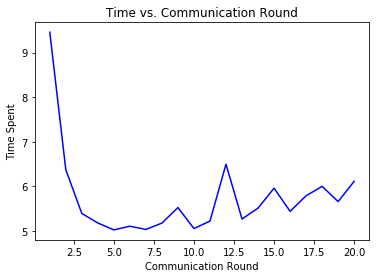

Total time spent: 114.79388475418091 seconds.
Average time spent: 5.739694237709045 seconds.


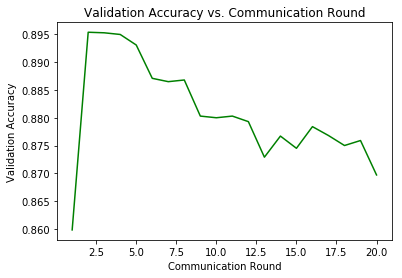

Best validation accuracy: 0.8953999876976013 (round: 2)


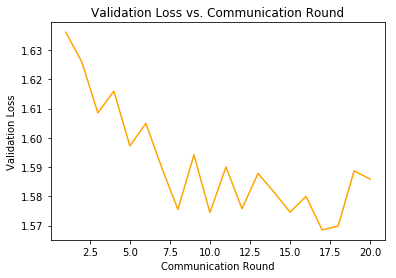

Best validation loss: 1.5685042142868042 (round: 17)


In [34]:
history4 = {"duration": [9.457051992416382, 6.372603893280029, 5.392894983291626, 5.179382085800171, 5.024111986160278, 5.107612133026123, 5.034692287445068, 5.177249193191528, 5.525430917739868, 5.054410934448242, 5.223117828369141, 6.497796058654785, 5.268925905227661, 5.51272988319397, 5.960234880447388, 5.441284894943237, 5.790164947509766, 6.0000739097595215, 5.659609079360962, 6.114506959915161], "config": {"num_clients": 20, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.1, "max_rounds": 20, "batch_size": 50, "epochs": 10, "learning_rate": 0.0001, "save_dir": "./results/"}, "accuracy": [0.8597999811172485, 0.8953999876976013, 0.8952999711036682, 0.8949999809265137, 0.8931000232696533, 0.8870999813079834, 0.8865000009536743, 0.8867999911308289, 0.880299985408783, 0.8799999952316284, 0.880299985408783, 0.8792999982833862, 0.8729000091552734, 0.8766999840736389, 0.8744999766349792, 0.8784000277519226, 0.876800000667572, 0.875, 0.8758999705314636, 0.869700014591217], "loss": [1.63614821434021, 1.625985860824585, 1.6085090637207031, 1.6159971952438354, 1.5972564220428467, 1.6049755811691284, 1.5896503925323486, 1.575512409210205, 1.5941553115844727, 1.5744411945343018, 1.5900672674179077, 1.575755000114441, 1.5878604650497437, 1.5813977718353271, 1.5745989084243774, 1.5799647569656372, 1.5685042142868042, 1.5698134899139404, 1.5887013673782349, 1.5858949422836304], "global_step": [57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0]}
show_stats(history4)

Experiment configuration: {'num_clients': 20, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.4, 'max_rounds': 20, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.0001, 'save_dir': './results/'}


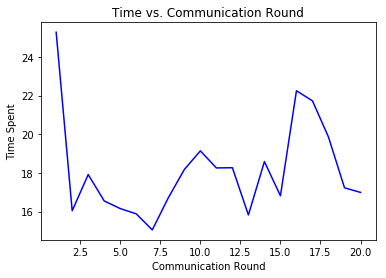

Total time spent: 362.69917464256287 seconds.
Average time spent: 18.134958732128144 seconds.


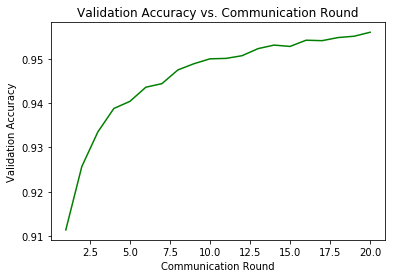

Best validation accuracy: 0.9559999704360962 (round: 20)


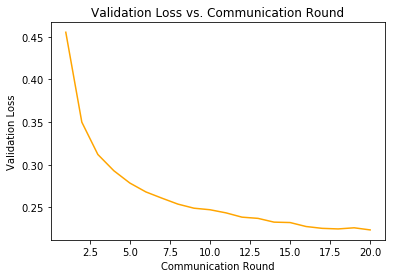

Best validation loss: 0.22358758747577667 (round: 20)


In [35]:
history5 = {"duration": [25.274085998535156, 16.0418119430542, 17.91413116455078, 16.549755811691284, 16.15544819831848, 15.88205099105835, 15.052357196807861, 16.71266198158264, 18.173887968063354, 19.14127278327942, 18.257642030715942, 18.268661975860596, 15.825552940368652, 18.583515882492065, 16.817474842071533, 22.24783992767334, 21.72572898864746, 19.853260040283203, 17.230762004852295, 16.99127197265625], "config": {"num_clients": 20, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.4, "max_rounds": 20, "batch_size": 50, "epochs": 10, "learning_rate": 0.0001, "save_dir": "./results/"}, "accuracy": [0.9114000201225281, 0.9257000088691711, 0.9334999918937683, 0.9387999773025513, 0.9404000043869019, 0.9435999989509583, 0.9444000124931335, 0.9474999904632568, 0.9488999843597412, 0.949999988079071, 0.9501000046730042, 0.9506999850273132, 0.9523000121116638, 0.9531000256538391, 0.9527999758720398, 0.954200029373169, 0.9541000127792358, 0.954800009727478, 0.9550999999046326, 0.9559999704360962], "loss": [0.4552392065525055, 0.34989380836486816, 0.31202659010887146, 0.2929236590862274, 0.2785072922706604, 0.26810380816459656, 0.2608112096786499, 0.2538181245326996, 0.24904313683509827, 0.2472342550754547, 0.24356740713119507, 0.2385401874780655, 0.23711515963077545, 0.2327042818069458, 0.23223522305488586, 0.22757472097873688, 0.22543179988861084, 0.22474250197410583, 0.22606895864009857, 0.22358758747577667], "global_step": [77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0]}
show_stats(history5)

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.1, 'max_rounds': 100, 'batch_size': 10, 'epochs': 1, 'learning_rate': 0.0001, 'save_dir': './results/', 'goal_accuracy': 0.97}


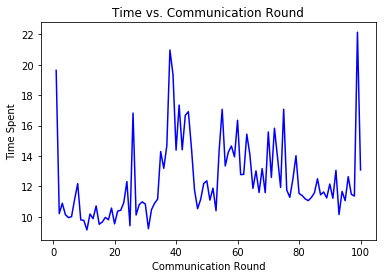

Total time spent: 1247.1684024333954 seconds.
Average time spent: 12.471684024333953 seconds.


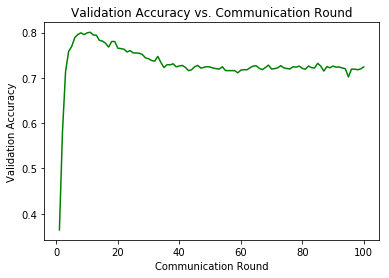

Best validation accuracy: 0.8007000088691711 (round: 11)


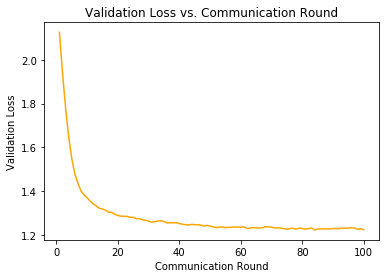

Best validation loss: 1.2228010892868042 (round: 84)


In [36]:
history6 = {"duration": [19.62919282913208, 10.212636947631836, 10.893168210983276, 10.14382791519165, 9.946507692337036, 10.010669231414795, 11.141575813293457, 12.179534196853638, 9.798643827438354, 9.76410698890686, 9.13852310180664, 10.18235182762146, 9.878169059753418, 10.716907978057861, 9.508927822113037, 9.659402132034302, 9.963083028793335, 9.804714918136597, 10.575625896453857, 9.538193941116333, 10.374905109405518, 10.428431034088135, 10.938194274902344, 12.319353103637695, 9.413191795349121, 16.81925916671753, 10.116672992706299, 10.798635005950928, 10.983265161514282, 10.837095022201538, 9.221438884735107, 10.465678930282593, 10.889082908630371, 11.16138219833374, 14.29177188873291, 13.187358856201172, 14.686530828475952, 20.96546196937561, 19.36156392097473, 14.383095026016235, 17.34547519683838, 14.405970811843872, 16.670451164245605, 16.912487983703613, 14.538316011428833, 11.759565114974976, 10.531155109405518, 11.14483094215393, 12.188837051391602, 12.369224786758423, 11.099189043045044, 11.88423776626587, 10.399377822875977, 14.33969521522522, 17.064974308013916, 13.342063903808594, 14.251262903213501, 14.65568995475769, 13.94304895401001, 16.350088834762573, 12.774459838867188, 12.787708759307861, 15.43441891670227, 14.104018926620483, 11.869049072265625, 13.02188515663147, 11.597537994384766, 13.171447992324829, 11.586489915847778, 15.576891899108887, 12.589746952056885, 15.826844930648804, 13.906354904174805, 11.934015989303589, 17.07015085220337, 11.758061170578003, 11.283632040023804, 12.485453128814697, 14.016262292861938, 11.533868074417114, 11.40146803855896, 11.181894302368164, 11.062635898590088, 11.268476009368896, 11.57424783706665, 12.500626802444458, 11.443193912506104, 11.634737253189087, 11.24068808555603, 12.153196096420288, 11.219624996185303, 13.055888891220093, 10.15238094329834, 11.668583869934082, 11.059410333633423, 12.641945838928223, 11.482295036315918, 11.361323118209839, 22.133357048034668, 13.080054998397827], "config": {"num_clients": 100, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.1, "max_rounds": 100, "batch_size": 10, "epochs": 1, "learning_rate": 0.0001, "save_dir": "./results/", "goal_accuracy": 0.97}, "accuracy": [0.364300012588501, 0.5814999938011169, 0.7139000296592712, 0.758400022983551, 0.7692999839782715, 0.7889999747276306, 0.7957000136375427, 0.7993999719619751, 0.7954000234603882, 0.7993000149726868, 0.8007000088691711, 0.794700026512146, 0.7942000031471252, 0.782800018787384, 0.7811999917030334, 0.7766000032424927, 0.7680000066757202, 0.7803000211715698, 0.7802000045776367, 0.765500009059906, 0.7645999789237976, 0.7631999850273132, 0.7572000026702881, 0.760200023651123, 0.7549999952316284, 0.7549999952316284, 0.7542999982833862, 0.7513999938964844, 0.7440000176429749, 0.7422000169754028, 0.7382000088691711, 0.7368999719619751, 0.7473999857902527, 0.7340999841690063, 0.7228000164031982, 0.729200005531311, 0.7287999987602234, 0.7310000061988831, 0.7243000268936157, 0.7261999845504761, 0.727400004863739, 0.7231000065803528, 0.7159000039100647, 0.7179999947547913, 0.7246999740600586, 0.7275000214576721, 0.7215999960899353, 0.7232000231742859, 0.7247999906539917, 0.7239000201225281, 0.7217000126838684, 0.720300018787384, 0.7195000052452087, 0.7245000004768372, 0.7161999940872192, 0.7159000039100647, 0.7160000205039978, 0.7160000205039978, 0.7110999822616577, 0.7170000076293945, 0.7181000113487244, 0.7178000211715698, 0.7224000096321106, 0.7260000109672546, 0.7267000079154968, 0.7210000157356262, 0.7181000113487244, 0.7228999733924866, 0.7281000018119812, 0.7195000052452087, 0.720300018787384, 0.722100019454956, 0.7268000245094299, 0.722100019454956, 0.7206000089645386, 0.7196000218391418, 0.7245000004768372, 0.7235999703407288, 0.7260000109672546, 0.7208999991416931, 0.7190999984741211, 0.7261000275611877, 0.7225000262260437, 0.7218000292778015, 0.7319999933242798, 0.7258999943733215, 0.7149999737739563, 0.7246999740600586, 0.7222999930381775, 0.7260000109672546, 0.7235000133514404, 0.7240999937057495, 0.7218000292778015, 0.7200999855995178, 0.7020000219345093, 0.7192000150680542, 0.7192999720573425, 0.7178999781608582, 0.7197999954223633, 0.7242000102996826], "loss": [2.126434087753296, 1.9416818618774414, 1.7816098928451538, 1.6494580507278442, 1.5507051944732666, 1.4801251888275146, 1.4363452196121216, 1.4016324281692505, 1.3829174041748047, 1.3699147701263428, 1.3545811176300049, 1.3414225578308105, 1.332456350326538, 1.321635127067566, 1.318230152130127, 1.3134570121765137, 1.3038278818130493, 1.3031734228134155, 1.294279932975769, 1.2891227006912231, 1.2857121229171753, 1.2851788997650146, 1.2847018241882324, 1.2799991369247437, 1.2806711196899414, 1.274145245552063, 1.274620771408081, 1.2690322399139404, 1.2673170566558838, 1.2631961107254028, 1.2579967975616455, 1.260099172592163, 1.263738751411438, 1.264366865158081, 1.2611732482910156, 1.2546885013580322, 1.2555196285247803, 1.2548365592956543, 1.2564258575439453, 1.2517033815383911, 1.2489031553268433, 1.2465027570724487, 1.2452365159988403, 1.248234748840332, 1.246556043624878, 1.246687412261963, 1.245106816291809, 1.2402900457382202, 1.2440229654312134, 1.2402904033660889, 1.2366422414779663, 1.2332451343536377, 1.2357054948806763, 1.2362563610076904, 1.2329908609390259, 1.2347205877304077, 1.2349518537521362, 1.2359460592269897, 1.2362388372421265, 1.2349649667739868, 1.236809253692627, 1.2294487953186035, 1.2308858633041382, 1.2337653636932373, 1.23154878616333, 1.2316142320632935, 1.2324182987213135, 1.237818956375122, 1.2366944551467896, 1.2355605363845825, 1.2316380739212036, 1.232662320137024, 1.2309900522232056, 1.2291843891143799, 1.2256791591644287, 1.229404091835022, 1.2298303842544556, 1.2261334657669067, 1.2307878732681274, 1.2295161485671997, 1.226427435874939, 1.2290116548538208, 1.2315051555633545, 1.2228010892868042, 1.226393699645996, 1.2277880907058716, 1.2271074056625366, 1.2278809547424316, 1.2276242971420288, 1.2291018962860107, 1.229504108428955, 1.2283849716186523, 1.231270670890808, 1.230459213256836, 1.2309837341308594, 1.232825756072998, 1.23140287399292, 1.2258878946304321, 1.2279906272888184, 1.2237612009048462], "global_step": [98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0]}
show_stats(history6)

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.1, 'max_rounds': 100, 'batch_size': 10, 'epochs': 1, 'learning_rate': 0.00036603234127322915, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


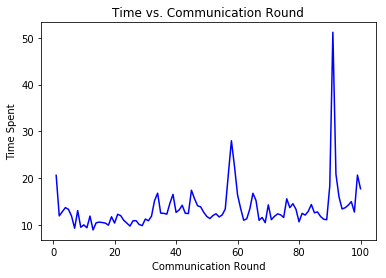

Total time spent: 1355.5408065319061 seconds.
Average time spent: 13.555408065319062 seconds.


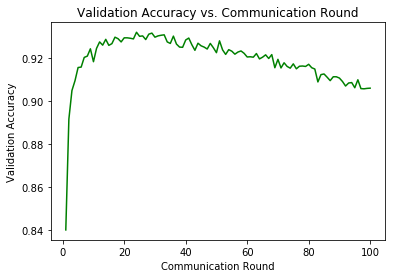

Best validation accuracy: 0.9319999814033508 (round: 24)


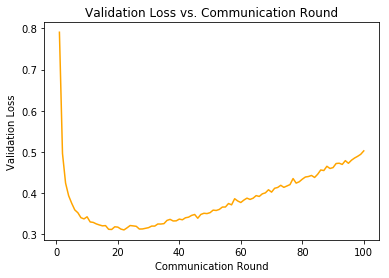

Best validation loss: 0.31093940138816833 (round: 22)


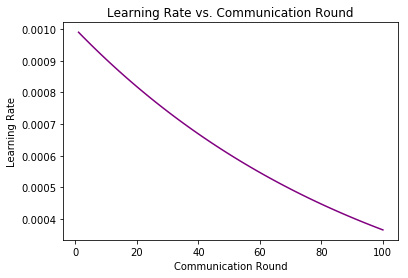

In [43]:
history7 = {"duration": [20.618587970733643, 11.95294189453125, 12.850674867630005, 13.713030815124512, 13.339680194854736, 11.908870935440063, 9.318355083465576, 13.080341100692749, 9.514573812484741, 10.022765159606934, 9.408377170562744, 11.906332015991211, 8.949199914932251, 10.466482877731323, 10.617980241775513, 10.527496337890625, 10.40321397781372, 9.965918064117432, 11.756999969482422, 10.417433023452759, 12.288518905639648, 11.997277021408081, 10.985249042510986, 10.401413917541504, 9.77034592628479, 10.906568765640259, 10.924906015396118, 10.105188131332397, 9.87589716911316, 11.27056097984314, 10.907435178756714, 11.863840818405151, 15.217417001724243, 16.79643702507019, 12.53800916671753, 12.487122774124146, 12.326660871505737, 14.65568208694458, 16.54561996459961, 12.698507070541382, 13.217452049255371, 14.211999893188477, 12.505738019943237, 12.445598840713501, 17.43087387084961, 15.614680051803589, 14.111724853515625, 13.872029066085815, 12.704551935195923, 11.83039116859436, 11.37934398651123, 12.026726245880127, 12.405812978744507, 11.726148843765259, 12.150727987289429, 13.420153856277466, 20.837738037109375, 28.0094997882843, 22.54765510559082, 16.449920892715454, 13.545399188995361, 11.016871929168701, 11.335961818695068, 13.455293893814087, 16.778391122817993, 15.236889839172363, 11.003204107284546, 11.608941078186035, 10.500916957855225, 14.306737899780273, 11.138375759124756, 11.846551895141602, 12.373639345169067, 12.184752225875854, 11.606676816940308, 15.602317810058594, 13.707695245742798, 14.552458047866821, 13.356513023376465, 10.677896976470947, 12.48991322517395, 12.119917869567871, 12.928189039230347, 14.37271499633789, 12.61538815498352, 12.789366006851196, 11.817792177200317, 11.242161273956299, 11.130445003509521, 18.40553903579712, 51.19227409362793, 20.862202167510986, 15.9998619556427, 13.432563066482544, 13.686646223068237, 14.235542058944702, 15.00168490409851, 12.769495725631714, 20.669920921325684, 17.743022918701172], "config": {"num_clients": 100, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.1, "max_rounds": 100, "batch_size": 10, "epochs": 1, "learning_rate": 0.00036603234127322915, "save_dir": "./results/", "goal_accuracy": 0.97, "lr_decay": 0.99}, "learning_rate": [0.00099, 0.0009801, 0.000970299, 0.0009605960099999999, 0.0009509900498999999, 0.0009414801494009999, 0.0009320653479069899, 0.00092274469442792, 0.0009135172474836408, 0.0009043820750088043, 0.0008953382542587163, 0.0008863848717161291, 0.0008775210229989678, 0.0008687458127689781, 0.0008600583546412883, 0.0008514577710948754, 0.0008429431933839266, 0.0008345137614500873, 0.0008261686238355864, 0.0008179069375972306, 0.0008097278682212583, 0.0008016305895390457, 0.0007936142836436553, 0.0007856781408072188, 0.0007778213593991466, 0.000770043145805155, 0.0007623427143471034, 0.0007547192872036325, 0.0007471720943315961, 0.0007397003733882801, 0.0007323033696543973, 0.0007249803359578533, 0.0007177305325982747, 0.000710553227272292, 0.000703447694999569, 0.0006964132180495733, 0.0006894490858690775, 0.0006825545950103868, 0.000675729049060283, 0.0006689717585696801, 0.0006622820409839833, 0.0006556592205741434, 0.0006491026283684019, 0.0006426116020847179, 0.0006361854860638707, 0.000629823631203232, 0.0006235253948911997, 0.0006172901409422877, 0.0006111172395328649, 0.0006050060671375363, 0.0005989560064661609, 0.0005929664464014993, 0.0005870367819374844, 0.0005811664141181095, 0.0005753547499769285, 0.0005696012024771592, 0.0005639051904523875, 0.0005582661385478637, 0.000552683477162385, 0.0005471566423907612, 0.0005416850759668536, 0.000536268225207185, 0.0005309055429551132, 0.000525596487525562, 0.0005203405226503064, 0.0005151371174238034, 0.0005099857462495653, 0.0005048858887870696, 0.0004998370298991989, 0.000494838659600207, 0.0004898902730042048, 0.0004849913702741628, 0.00048014145657142114, 0.00047534004200570695, 0.0004705866415856499, 0.0004658807751697934, 0.00046122196741809544, 0.0004566097477439145, 0.00045204365026647533, 0.0004475232137638106, 0.0004430479816261725, 0.00043861750180991077, 0.00043423132679181164, 0.0004298890135238935, 0.0004255901233886546, 0.00042133422215476804, 0.00041712087993322035, 0.0004129496711338881, 0.0004088201744225492, 0.0004047319726783237, 0.00040068465295154044, 0.00039667780642202503, 0.0003927110283578048, 0.00038878391807422674, 0.0003848960788934845, 0.00038104711810454966, 0.00037723664692350416, 0.00037346428045426913, 0.00036972963764972643, 0.00036603234127322915], "accuracy": [0.8400999903678894, 0.8916000127792358, 0.9049000144004822, 0.909500002861023, 0.9156000018119812, 0.9157999753952026, 0.9203000068664551, 0.9208999872207642, 0.9243000149726868, 0.9182999730110168, 0.9244999885559082, 0.9275000095367432, 0.9259999990463257, 0.9286999702453613, 0.9258999824523926, 0.9266999959945679, 0.9297000169754028, 0.9290000200271606, 0.9275000095367432, 0.9294000267982483, 0.9294000267982483, 0.9291999936103821, 0.9289000034332275, 0.9319999814033508, 0.9301000237464905, 0.9302999973297119, 0.928600013256073, 0.9311000108718872, 0.9315999746322632, 0.9297000169754028, 0.9302999973297119, 0.9305999875068665, 0.9308000206947327, 0.9275000095367432, 0.926800012588501, 0.9301999807357788, 0.9265000224113464, 0.9251000285148621, 0.925000011920929, 0.9283999800682068, 0.9293000102043152, 0.9261999726295471, 0.9236000180244446, 0.9269000291824341, 0.9257000088691711, 0.9251000285148621, 0.9241999983787537, 0.926800012588501, 0.9247999787330627, 0.9225000143051147, 0.9279999732971191, 0.923799991607666, 0.9217000007629395, 0.9239000082015991, 0.9232000112533569, 0.9218000173568726, 0.9228000044822693, 0.92330002784729, 0.9222000241279602, 0.9204999804496765, 0.9205999970436096, 0.9204000234603882, 0.9221000075340271, 0.9196000099182129, 0.9204000234603882, 0.921500027179718, 0.9197999835014343, 0.9215999841690063, 0.9154999852180481, 0.9193999767303467, 0.9154000282287598, 0.9178000092506409, 0.916100025177002, 0.9153000116348267, 0.9172999858856201, 0.9150000214576721, 0.9161999821662903, 0.9162999987602234, 0.916100025177002, 0.9171000123023987, 0.9154999852180481, 0.914900004863739, 0.9089000225067139, 0.9122999906539917, 0.9125999808311462, 0.9110999703407288, 0.909500002861023, 0.911300003528595, 0.911300003528595, 0.9107000231742859, 0.9090999960899353, 0.9070000052452087, 0.9083999991416931, 0.9085999727249146, 0.9061999917030334, 0.9099000096321106, 0.9057999849319458, 0.9057000279426575, 0.9059000015258789, 0.906000018119812], "loss": [0.79067063331604, 0.4964476525783539, 0.42467963695526123, 0.39393705129623413, 0.37552404403686523, 0.3594874143600464, 0.352601021528244, 0.3406226933002472, 0.33765241503715515, 0.34276083111763, 0.33030661940574646, 0.32918503880500793, 0.3255264461040497, 0.3229789435863495, 0.32079562544822693, 0.3214372396469116, 0.3124515414237976, 0.3120429813861847, 0.31849849224090576, 0.3177415430545807, 0.3129297196865082, 0.31093940138816833, 0.3160305321216583, 0.32157599925994873, 0.3206729590892792, 0.3196747601032257, 0.31307804584503174, 0.31325557827949524, 0.3148420453071594, 0.316450297832489, 0.32024821639060974, 0.32021647691726685, 0.32529187202453613, 0.3252142667770386, 0.32617831230163574, 0.33402395248413086, 0.33654457330703735, 0.3326413631439209, 0.33295804262161255, 0.33720293641090393, 0.33555933833122253, 0.34038493037223816, 0.3418952226638794, 0.3461720049381256, 0.34836649894714355, 0.3392663598060608, 0.34847378730773926, 0.35132941603660583, 0.3505905866622925, 0.35280463099479675, 0.35896167159080505, 0.3581342101097107, 0.3606489896774292, 0.36640578508377075, 0.3665495216846466, 0.3750186264514923, 0.3718181550502777, 0.38666847348213196, 0.3811265528202057, 0.37747833132743835, 0.38335084915161133, 0.3880387842655182, 0.38493987917900085, 0.38791587948799133, 0.3942032754421234, 0.39215755462646484, 0.3985055685043335, 0.4008905589580536, 0.4083959758281708, 0.40264463424682617, 0.41198933124542236, 0.413996160030365, 0.4191986620426178, 0.4142269790172577, 0.41755715012550354, 0.42093223333358765, 0.4356090724468231, 0.4245360195636749, 0.427771657705307, 0.43408334255218506, 0.4393211603164673, 0.44054514169692993, 0.44310256838798523, 0.4382075071334839, 0.44600778818130493, 0.4564007520675659, 0.45504987239837646, 0.4653816819190979, 0.4600268006324768, 0.46215713024139404, 0.47210368514060974, 0.4727921187877655, 0.4699319303035736, 0.4790438413619995, 0.4726414382457733, 0.48012909293174744, 0.48541557788848877, 0.4895668923854828, 0.4944268763065338, 0.5027785897254944], "global_step": [199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 254.0, 255.0, 256.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0]}
show_stats(history7)

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 100, 'batch_size': 10, 'epochs': 1, 'learning_rate': 5.811664141181098e-05, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


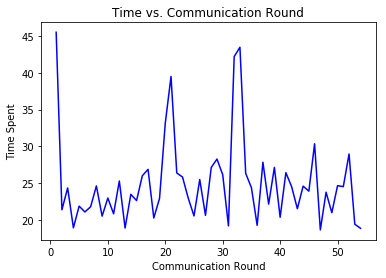

Total time spent: 1350.5838406085968 seconds.
Average time spent: 25.010811863122164 seconds.


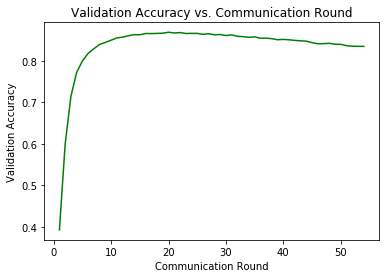

Best validation accuracy: 0.868399977684021 (round: 20)


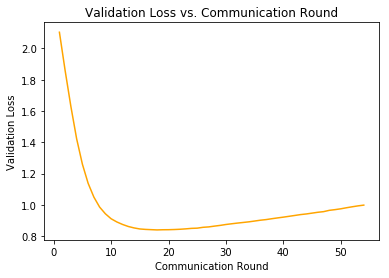

Best validation loss: 0.8392846584320068 (round: 18)


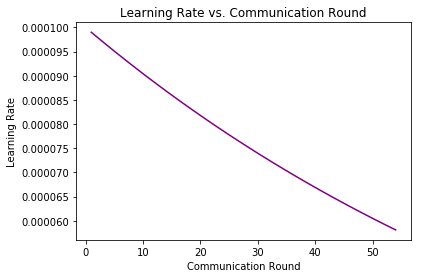

In [48]:
history8 = \
{"duration": [45.4843590259552, 21.40248990058899, 24.36624312400818, 18.955472946166992, 21.89869785308838, 21.10748291015625, 21.809614896774292, 24.63997483253479, 20.540378093719482, 22.993387937545776, 20.855204820632935, 25.307137966156006, 18.92441701889038, 23.501641988754272, 22.65149188041687, 26.012869834899902, 26.886091947555542, 20.29543685913086, 22.941314220428467, 33.166926860809326, 39.48349404335022, 26.395894050598145, 25.84486675262451, 22.974703073501587, 20.56860613822937, 25.507977962493896, 20.64781093597412, 27.13186502456665, 28.28085231781006, 26.164928913116455, 19.22111701965332, 42.1870698928833, 43.44643998146057, 26.34315323829651, 24.404637813568115, 19.291874885559082, 27.851155281066895, 22.166822910308838, 27.158833026885986, 20.382472038269043, 26.43397569656372, 24.542293071746826, 21.54415988922119, 24.608026027679443, 23.92979097366333, 30.35673689842224, 18.66964101791382, 23.784883975982666, 21.005104064941406, 24.671793937683105, 24.539237022399902, 28.971561908721924, 19.44358801841736, 18.887837886810303], "config": {"num_clients": 100, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.2, "max_rounds": 100, "batch_size": 10, "epochs": 1, "learning_rate": 5.811664141181098e-05, "save_dir": "./results/", "goal_accuracy": 0.97, "lr_decay": 0.99}, "learning_rate": [9.900000000000001e-05, 9.801e-05, 9.70299e-05, 9.605960100000001e-05, 9.509900499000001e-05, 9.414801494010001e-05, 9.320653479069902e-05, 9.227446944279203e-05, 9.13517247483641e-05, 9.043820750088047e-05, 8.953382542587167e-05, 8.863848717161295e-05, 8.775210229989682e-05, 8.687458127689785e-05, 8.600583546412887e-05, 8.514577710948758e-05, 8.429431933839271e-05, 8.345137614500879e-05, 8.26168623835587e-05, 8.17906937597231e-05, 8.097278682212587e-05, 8.016305895390461e-05, 7.936142836436556e-05, 7.856781408072191e-05, 7.778213593991469e-05, 7.700431458051554e-05, 7.623427143471038e-05, 7.547192872036328e-05, 7.471720943315964e-05, 7.397003733882805e-05, 7.323033696543977e-05, 7.249803359578537e-05, 7.177305325982752e-05, 7.105532272722923e-05, 7.034476949995695e-05, 6.964132180495738e-05, 6.89449085869078e-05, 6.825545950103872e-05, 6.757290490602833e-05, 6.689717585696805e-05, 6.622820409839837e-05, 6.556592205741439e-05, 6.491026283684025e-05, 6.426116020847184e-05, 6.361854860638712e-05, 6.298236312032325e-05, 6.235253948912002e-05, 6.172901409422881e-05, 6.111172395328652e-05, 6.050060671375366e-05, 5.9895600646616125e-05, 5.9296644640149966e-05, 5.8703678193748465e-05, 5.811664141181098e-05], "accuracy": [0.3930000066757202, 0.5993000268936157, 0.7139999866485596, 0.7717999815940857, 0.7993000149726868, 0.8177000284194946, 0.8288000226020813, 0.8391000032424927, 0.843999981880188, 0.8493000268936157, 0.8547000288963318, 0.8565999865531921, 0.8597999811172485, 0.8626000285148621, 0.8622000217437744, 0.8654000163078308, 0.8651999831199646, 0.8655999898910522, 0.866100013256073, 0.868399977684021, 0.866599977016449, 0.8676000237464905, 0.8654000163078308, 0.8657000064849854, 0.8655999898910522, 0.8633000254631042, 0.864799976348877, 0.8622999787330627, 0.8629000186920166, 0.8604000210762024, 0.8621000051498413, 0.8586000204086304, 0.8578000068664551, 0.8561000227928162, 0.8572999835014343, 0.8539999723434448, 0.854200005531311, 0.8529000282287598, 0.8503999710083008, 0.8511999845504761, 0.8501999974250793, 0.848800003528595, 0.8478000164031982, 0.8468999862670898, 0.8432999849319458, 0.8406999707221985, 0.8410000205039978, 0.8417999744415283, 0.8395000100135803, 0.8392999768257141, 0.8360999822616577, 0.8349000215530396, 0.8345000147819519, 0.8343999981880188], "loss": [2.1037769317626953, 1.8574806451797485, 1.6281181573867798, 1.4220136404037476, 1.2599159479141235, 1.1374458074569702, 1.0492085218429565, 0.9853331446647644, 0.9425666928291321, 0.9106987118721008, 0.8901693820953369, 0.8741471767425537, 0.8611302375793457, 0.8520345687866211, 0.8453789353370667, 0.8425533175468445, 0.8408976793289185, 0.8392846584320068, 0.8403252959251404, 0.8406649231910706, 0.8417814373970032, 0.8434734344482422, 0.8460192084312439, 0.8491741418838501, 0.8505371809005737, 0.8559380173683167, 0.8585463166236877, 0.8636056184768677, 0.8682453036308289, 0.8740342259407043, 0.8785965442657471, 0.8829931616783142, 0.8869667649269104, 0.8910025954246521, 0.8961284160614014, 0.9014131426811218, 0.9053946137428284, 0.9109846949577332, 0.9161378741264343, 0.9210056066513062, 0.9264134168624878, 0.9318607449531555, 0.9373777508735657, 0.9414183497428894, 0.9467571377754211, 0.9521234035491943, 0.9561504125595093, 0.9645870327949524, 0.9690450429916382, 0.9743630290031433, 0.9811499714851379, 0.9873296022415161, 0.993118166923523, 0.9978771209716797], "global_step": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0]}
show_stats(history8)

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 100, 'batch_size': 50, 'epochs': 10, 'learning_rate': 5.753547499769287e-05, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


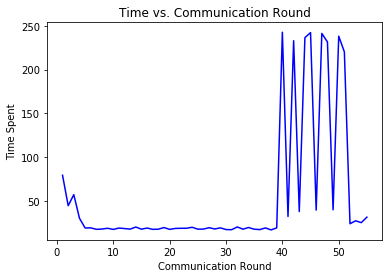

Total time spent: 3013.02592086792 seconds.
Average time spent: 54.782289470325814 seconds.


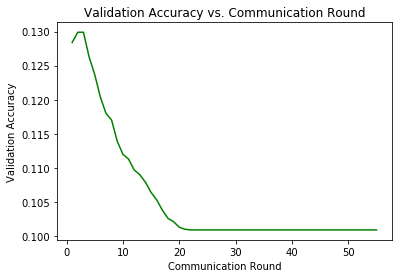

Best validation accuracy: 0.1298999935388565 (round: 2)


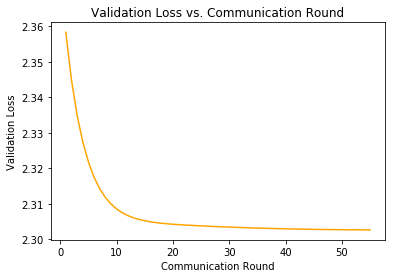

Best validation loss: 2.3026413917541504 (round: 55)


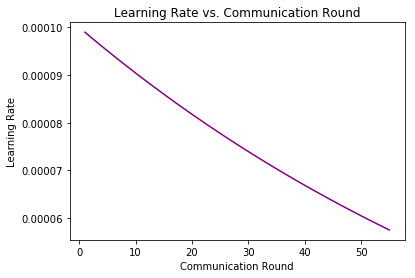

In [4]:
history9 = \
{"duration": [79.54756832122803, 44.83918809890747, 57.39982795715332, 30.577805042266846, 19.42239737510681, 19.53141212463379, 17.871952056884766, 18.17846179008484, 19.088671922683716, 17.768661975860596, 19.29975390434265, 18.752379179000854, 18.101852893829346, 20.48723006248474, 17.992107629776, 19.344820022583008, 17.83422589302063, 18.04307198524475, 19.88286328315735, 17.819002151489258, 18.861514806747437, 19.046955108642578, 19.086345911026, 20.215911865234375, 18.05771493911743, 18.1340651512146, 19.75379180908203, 18.2449049949646, 19.55236506462097, 17.61133623123169, 17.442302942276, 20.568553924560547, 18.03782081604004, 19.941039085388184, 18.014901876449585, 17.594496965408325, 19.43578815460205, 17.196933031082153, 19.554579973220825, 242.587660074234, 32.5230450630188, 232.93836092948914, 38.134166955947876, 236.40372776985168, 242.19231700897217, 39.7834906578064, 241.198233127594, 231.5180060863495, 40.16635298728943, 238.10561108589172, 220.2447690963745, 24.239882946014404, 27.590873956680298, 25.5144259929657, 31.750420808792114], "config": {"num_clients": 100, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.2, "max_rounds": 100, "batch_size": 50, "epochs": 10, "learning_rate": 5.753547499769287e-05, "save_dir": "./results/", "goal_accuracy": 0.97, "lr_decay": 0.99}, "learning_rate": [9.900000000000001e-05, 9.801e-05, 9.70299e-05, 9.605960100000001e-05, 9.509900499000001e-05, 9.414801494010001e-05, 9.320653479069902e-05, 9.227446944279203e-05, 9.13517247483641e-05, 9.043820750088047e-05, 8.953382542587167e-05, 8.863848717161295e-05, 8.775210229989682e-05, 8.687458127689785e-05, 8.600583546412887e-05, 8.514577710948758e-05, 8.429431933839271e-05, 8.345137614500879e-05, 8.26168623835587e-05, 8.17906937597231e-05, 8.097278682212587e-05, 8.016305895390461e-05, 7.936142836436556e-05, 7.856781408072191e-05, 7.778213593991469e-05, 7.700431458051554e-05, 7.623427143471038e-05, 7.547192872036328e-05, 7.471720943315964e-05, 7.397003733882805e-05, 7.323033696543977e-05, 7.249803359578537e-05, 7.177305325982752e-05, 7.105532272722923e-05, 7.034476949995695e-05, 6.964132180495738e-05, 6.89449085869078e-05, 6.825545950103872e-05, 6.757290490602833e-05, 6.689717585696805e-05, 6.622820409839837e-05, 6.556592205741439e-05, 6.491026283684025e-05, 6.426116020847184e-05, 6.361854860638712e-05, 6.298236312032325e-05, 6.235253948912002e-05, 6.172901409422881e-05, 6.111172395328652e-05, 6.050060671375366e-05, 5.9895600646616125e-05, 5.9296644640149966e-05, 5.8703678193748465e-05, 5.811664141181098e-05, 5.753547499769287e-05], "accuracy": [0.12839999794960022, 0.1298999935388565, 0.1298999935388565, 0.12630000710487366, 0.12370000034570694, 0.12039999663829803, 0.11800000071525574, 0.11699999868869781, 0.11389999836683273, 0.1120000034570694, 0.11129999905824661, 0.10970000177621841, 0.10899999737739563, 0.10790000110864639, 0.10639999806880951, 0.10530000180006027, 0.10379999876022339, 0.10260000079870224, 0.10209999978542328, 0.10130000114440918, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213], "loss": [2.3583576679229736, 2.345059871673584, 2.335008144378662, 2.3275182247161865, 2.3218941688537598, 2.3175764083862305, 2.314297914505005, 2.3118433952331543, 2.3099775314331055, 2.308572292327881, 2.307507038116455, 2.30668306350708, 2.306062698364258, 2.305593252182007, 2.305224895477295, 2.3049371242523193, 2.304706335067749, 2.304521083831787, 2.3043673038482666, 2.30423903465271, 2.3041276931762695, 2.304028034210205, 2.303941249847412, 2.3038580417633057, 2.303781509399414, 2.3037071228027344, 2.303635835647583, 2.3035686016082764, 2.30350399017334, 2.3034417629241943, 2.3033812046051025, 2.3033227920532227, 2.3032679557800293, 2.3032150268554688, 2.303164482116699, 2.303117275238037, 2.3030717372894287, 2.3030292987823486, 2.3029894828796387, 2.3029515743255615, 2.3029167652130127, 2.302884101867676, 2.3028550148010254, 2.302827835083008, 2.3028016090393066, 2.30277943611145, 2.30275821685791, 2.302738904953003, 2.302720546722412, 2.3027045726776123, 2.302690029144287, 2.3026769161224365, 2.3026630878448486, 2.302651882171631, 2.3026413917541504], "global_step": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0]}
show_stats(history9)

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 100, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.043861750180991095, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


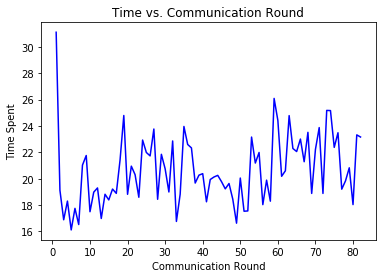

Total time spent: 1692.3619513511658 seconds.
Average time spent: 20.63856038233129 seconds.


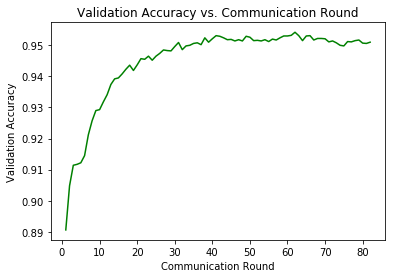

Best validation accuracy: 0.954200029373169 (round: 62)


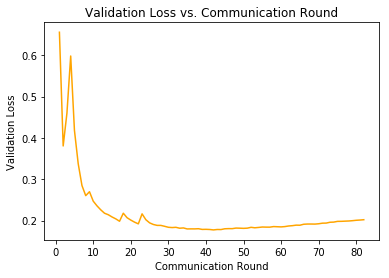

Best validation loss: 0.17745710909366608 (round: 42)


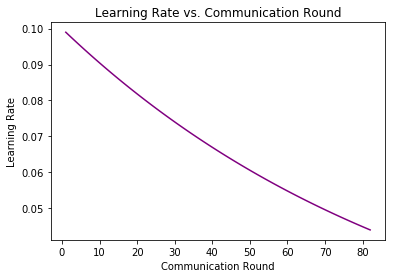

In [21]:
show_results('./results/1524347793.251713')

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 100, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.0777567836148454, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


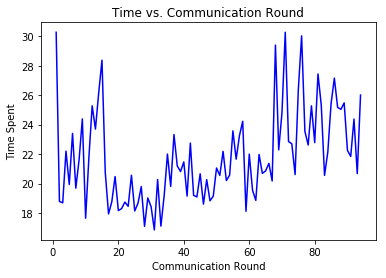

Total time spent: 2048.1862921714783 seconds.
Average time spent: 21.78921587416466 seconds.


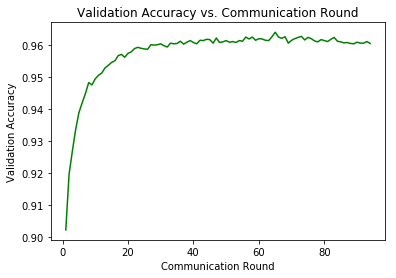

Best validation accuracy: 0.9639000296592712 (round: 65)


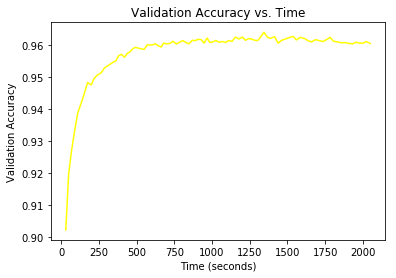

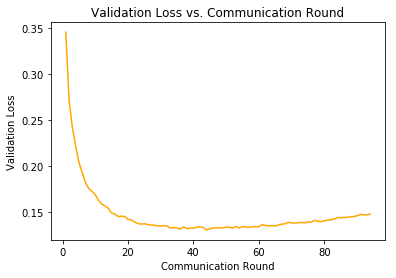

Best validation loss: 0.1307135969400406 (round: 44)


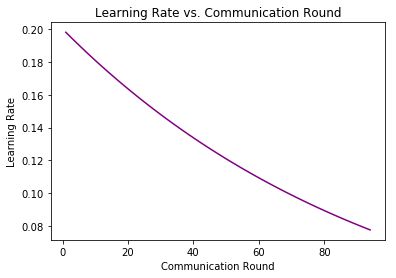

In [38]:
show_results('./results/1524350077.663651')

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 100, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.12388490134016644, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


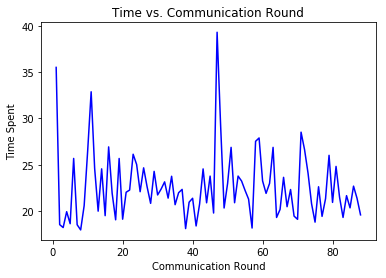

Total time spent: 1995.35462641716 seconds.
Average time spent: 22.67448439110409 seconds.


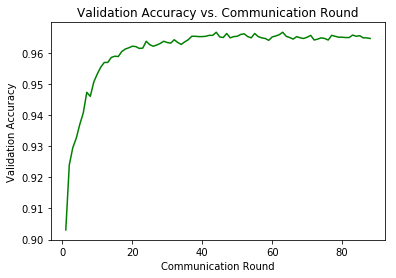

Best validation accuracy: 0.9666000008583069 (round: 44)


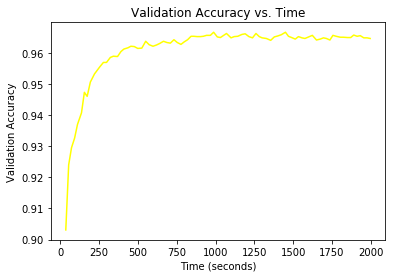

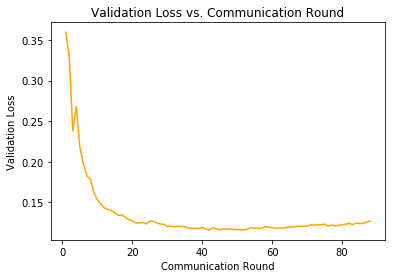

Best validation loss: 0.11614775657653809 (round: 42)


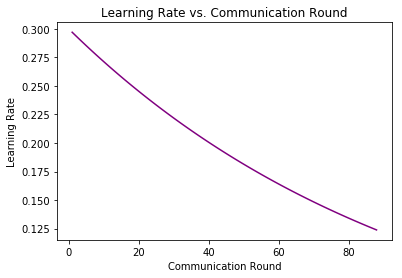

In [43]:
show_results('./results/1524352247.543422')

Experiment configuration: {'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 100, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.10980970238196874, 'save_dir': './results/', 'goal_accuracy': 0.97, 'lr_decay': 0.99}


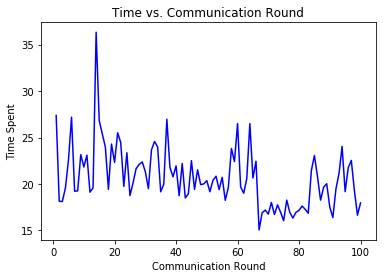

Total time spent: 2068.411834001541 seconds.
Average time spent: 20.684118340015413 seconds.


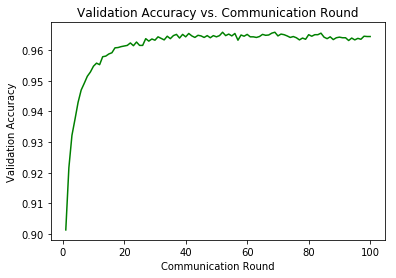

Best validation accuracy: 0.9659000039100647 (round: 52)


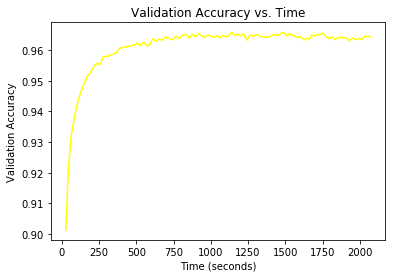

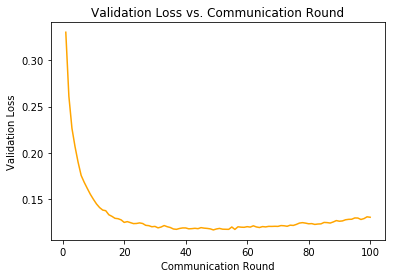

Best validation loss: 0.11698222905397415 (round: 49)


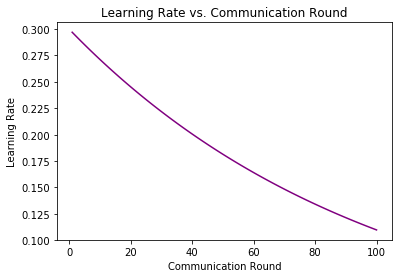

In [44]:
show_results('./results/1524361459.78515')

Experiment configuration: {'num_clients': 100, 'model_type': 'cnn-mnist', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 25, 'batch_size': 50, 'epochs': 5, 'learning_rate': 0.008600583546412886, 'save_dir': './results/', 'goal_accuracy': 0.99, 'lr_decay': 0.99}


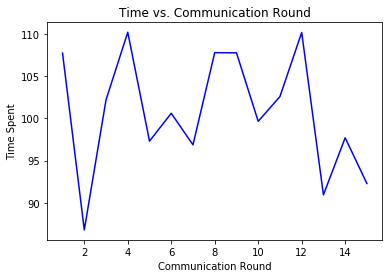

Total time spent: 1510.3190703392029 seconds.
Average time spent: 100.68793802261352 seconds.


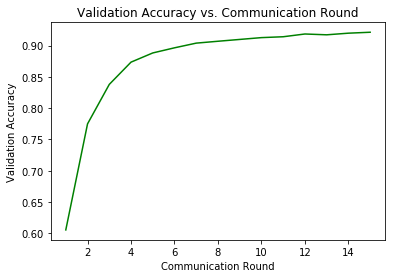

Best validation accuracy: 0.9214000105857849 (round: 15)


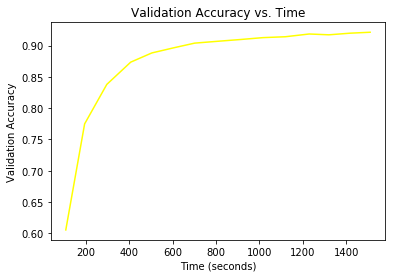

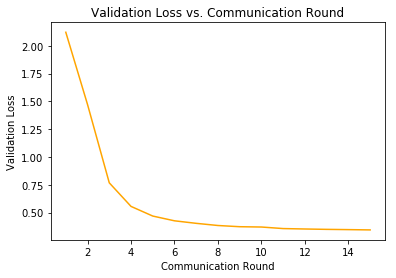

Best validation loss: 0.34475308656692505 (round: 15)


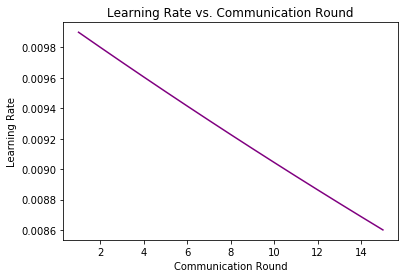

In [46]:
show_results('results/1524379611.222811')

Experiment configuration: {'num_clients': 100, 'model_type': 'cnn-mnist', 'dataset_type': 'iid', 'fraction': 0.2, 'max_rounds': 25, 'batch_size': 50, 'epochs': 5, 'learning_rate': 0.03928390704036094, 'save_dir': './results/', 'goal_accuracy': 0.99, 'lr_decay': 0.99}


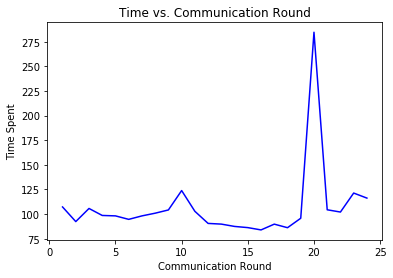

Total time spent: 2565.5246436595917 seconds.
Average time spent: 106.89686015248299 seconds.


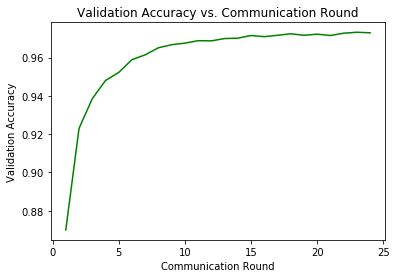

Best validation accuracy: 0.9732000231742859 (round: 23)


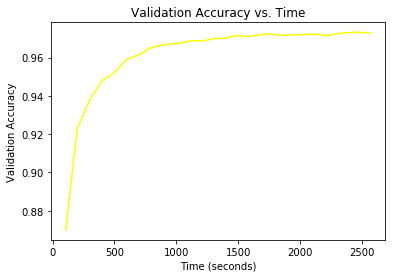

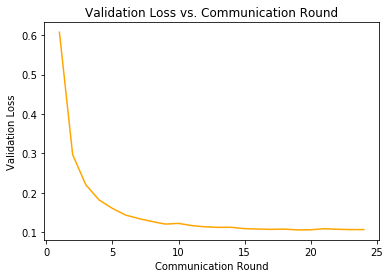

Best validation loss: 0.10603103041648865 (round: 19)


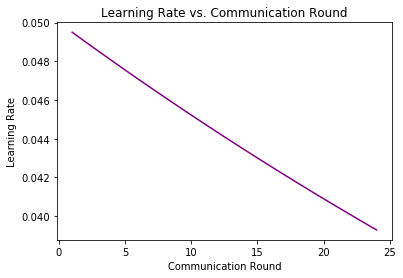

In [49]:
show_results('results/1524432267.460806')

In [50]:
# No preprocessing on CIFAR10
show_results('results/1524462872.807307')

Experiment configuration: {'notes': '', 'num_clients': 10, 'model_type': 'cnn-cifar10', 'dataset_type': 'iid', 'fraction': 0.5, 'max_rounds': 10, 'batch_size': 50, 'epochs': 1, 'learning_rate': 9.9e-06, 'save_dir': './results', 'goal_accuracy': 0.95, 'lr_decay': 0.99}
Total time spent: 60.49242687225342 seconds.
Average time spent: 60.49242687225342 seconds.
Best validation accuracy: 0.14079999923706055 (round: 1)
Best validation loss: 3.4761993885040283 (round: 1)


Experiment configuration: {'notes': '', 'num_clients': 100, 'model_type': 'perceptron', 'dataset_type': 'iid', 'fraction': 0.1, 'max_rounds': 100000, 'batch_size': 50, 'epochs': 10, 'learning_rate': 0.04171208799332206, 'save_dir': './results', 'goal_accuracy': 1.0, 'lr_decay': 0.99, 'averaging_type': 'val_acc'}


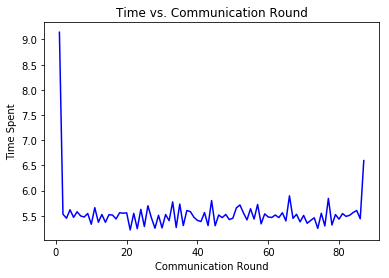

Total time spent: 482.43404245376587 seconds.
Average time spent: 5.545218878778918 seconds.


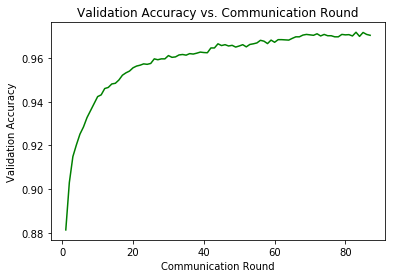

Best validation accuracy: 0.9718999862670898 (round: 83)


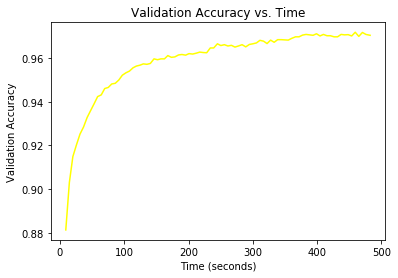

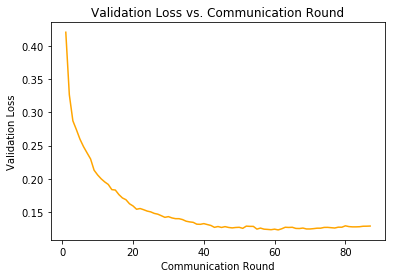

Best validation loss: 0.12284015864133835 (round: 61)


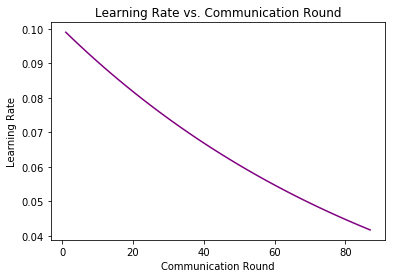

In [2]:
history_acc = \
{"duration": [9.144046306610107, 5.531506538391113, 5.451196670532227, 5.61880898475647, 5.468409061431885, 5.578634738922119, 5.496243000030518, 5.475075960159302, 5.545189380645752, 5.331226348876953, 5.660245656967163, 5.371511220932007, 5.5242760181427, 5.369916677474976, 5.521178960800171, 5.513566970825195, 5.436151742935181, 5.558656215667725, 5.550169467926025, 5.557791471481323, 5.218674898147583, 5.547281265258789, 5.243217468261719, 5.626374244689941, 5.286529064178467, 5.699091196060181, 5.457151889801025, 5.252887487411499, 5.50932502746582, 5.258221387863159, 5.523833513259888, 5.402780532836914, 5.775700807571411, 5.267498970031738, 5.732407093048096, 5.304682731628418, 5.604767560958862, 5.581629276275635, 5.470921993255615, 5.407541275024414, 5.3854310512542725, 5.563034772872925, 5.305028676986694, 5.801597356796265, 5.30188775062561, 5.514690160751343, 5.462906360626221, 5.525735378265381, 5.4242823123931885, 5.450006723403931, 5.655818462371826, 5.714555501937866, 5.557021617889404, 5.417910575866699, 5.63845419883728, 5.4346771240234375, 5.724217653274536, 5.339111089706421, 5.53655743598938, 5.475364446640015, 5.46591591835022, 5.514489412307739, 5.463270425796509, 5.559422254562378, 5.396789312362671, 5.894912242889404, 5.448463201522827, 5.528599262237549, 5.379519462585449, 5.506537437438965, 5.350943326950073, 5.406590938568115, 5.459231615066528, 5.249598979949951, 5.548979997634888, 5.297677516937256, 5.845097303390503, 5.316878795623779, 5.523645639419556, 5.432070732116699, 5.542472839355469, 5.487069845199585, 5.50898003578186, 5.564077377319336, 5.60408616065979, 5.44072413444519, 6.595390558242798], "config": {"notes": "", "num_clients": 100, "model_type": "perceptron", "dataset_type": "iid", "fraction": 0.1, "max_rounds": 100000, "batch_size": 50, "epochs": 10, "learning_rate": 0.04171208799332206, "save_dir": "./results", "goal_accuracy": 1.0, "lr_decay": 0.99, "averaging_type": "val_acc"}, "learning_rate": [0.099, 0.09801, 0.0970299, 0.096059601, 0.09509900499, 0.0941480149401, 0.093206534790699, 0.09227446944279201, 0.09135172474836409, 0.09043820750088044, 0.08953382542587164, 0.08863848717161292, 0.08775210229989679, 0.08687458127689782, 0.08600583546412884, 0.08514577710948755, 0.08429431933839267, 0.08345137614500873, 0.08261686238355864, 0.08179069375972306, 0.08097278682212583, 0.08016305895390458, 0.07936142836436554, 0.07856781408072187, 0.07778213593991465, 0.0770043145805155, 0.07623427143471034, 0.07547192872036323, 0.0747172094331596, 0.073970037338828, 0.07323033696543972, 0.07249803359578533, 0.07177305325982747, 0.0710553227272292, 0.07034476949995691, 0.06964132180495734, 0.06894490858690777, 0.06825545950103869, 0.0675729049060283, 0.06689717585696801, 0.06622820409839833, 0.06556592205741435, 0.0649102628368402, 0.06426116020847181, 0.06361854860638709, 0.06298236312032322, 0.06235253948911999, 0.06172901409422879, 0.061111723953286505, 0.06050060671375364, 0.0598956006466161, 0.05929664464014994, 0.05870367819374844, 0.05811664141181096, 0.05753547499769285, 0.05696012024771592, 0.05639051904523876, 0.05582661385478637, 0.05526834771623851, 0.054715664239076124, 0.054168507596685365, 0.053626822520718515, 0.05309055429551133, 0.05255964875255621, 0.05203405226503065, 0.05151371174238034, 0.050998574624956536, 0.05048858887870697, 0.0499837029899199, 0.049483865960020704, 0.0489890273004205, 0.048499137027416296, 0.048014145657142134, 0.04753400420057071, 0.047058664158565, 0.046588077516979354, 0.04612219674180956, 0.04566097477439147, 0.045204365026647556, 0.04475232137638108, 0.044304798162617266, 0.043861750180991095, 0.04342313267918119, 0.04298890135238938, 0.042559012338865485, 0.04213342221547683, 0.04171208799332206], "accuracy": [0.8812999725341797, 0.902999997138977, 0.914900004863739, 0.9203000068664551, 0.9251999855041504, 0.9284999966621399, 0.9327999949455261, 0.9359999895095825, 0.9391999840736389, 0.9423999786376953, 0.9431999921798706, 0.9460999965667725, 0.9466000199317932, 0.948199987411499, 0.9484999775886536, 0.949999988079071, 0.9521999955177307, 0.9532999992370605, 0.9541000127792358, 0.9556000232696533, 0.9563999772071838, 0.9567999839782715, 0.9574000239372253, 0.9571999907493591, 0.9575999975204468, 0.9596999883651733, 0.9592999815940857, 0.9596999883651733, 0.9596999883651733, 0.9611999988555908, 0.9603999853134155, 0.9606000185012817, 0.9614999890327454, 0.9617000222206116, 0.9613999724388123, 0.9621000289916992, 0.961899995803833, 0.9623000025749207, 0.9628000259399414, 0.9625999927520752, 0.9624999761581421, 0.9646999835968018, 0.9646999835968018, 0.9666000008583069, 0.9657999873161316, 0.9661999940872192, 0.9656000137329102, 0.9659000039100647, 0.9650999903678894, 0.9656000137329102, 0.9661999940872192, 0.9652000069618225, 0.9663000106811523, 0.9666000008583069, 0.9670000076293945, 0.9682000279426575, 0.9678000211715698, 0.96670001745224, 0.9682999849319458, 0.9672999978065491, 0.968500018119812, 0.968500018119812, 0.9684000015258789, 0.9682999849319458, 0.9690999984741211, 0.9697999954223633, 0.9697999954223633, 0.9706000089645386, 0.9708999991416931, 0.9707000255584717, 0.9704999923706055, 0.9711999893188477, 0.9702000021934509, 0.9708999991416931, 0.970300018787384, 0.970300018787384, 0.9697999954223633, 0.9697999954223633, 0.9708999991416931, 0.9707000255584717, 0.97079998254776, 0.9702000021934509, 0.9718999862670898, 0.9700000286102295, 0.9718000292778015, 0.9708999991416931, 0.9704999923706055], "loss": [0.4206068813800812, 0.3263668715953827, 0.28719815611839294, 0.27380430698394775, 0.25956764817237854, 0.2483571618795395, 0.23895350098609924, 0.2297685295343399, 0.21275575459003448, 0.20562635362148285, 0.19978469610214233, 0.19513781368732452, 0.1913384646177292, 0.1835494041442871, 0.1829022765159607, 0.17607933282852173, 0.17099915444850922, 0.16834039986133575, 0.16221794486045837, 0.15892696380615234, 0.15396511554718018, 0.15506874024868011, 0.15326422452926636, 0.15122319757938385, 0.15000814199447632, 0.14773216843605042, 0.14653880894184113, 0.14421719312667847, 0.14178404211997986, 0.14284402132034302, 0.1409052163362503, 0.1397881954908371, 0.1397581845521927, 0.13839071989059448, 0.13596288859844208, 0.1349174678325653, 0.1342475563287735, 0.1314907670021057, 0.13125553727149963, 0.13232430815696716, 0.13090352714061737, 0.1295430213212967, 0.12670265138149261, 0.12792567908763885, 0.126559779047966, 0.12778329849243164, 0.12655921280384064, 0.12588681280612946, 0.12649479508399963, 0.12677964568138123, 0.12522801756858826, 0.12854236364364624, 0.12820322811603546, 0.12814481556415558, 0.12405101954936981, 0.12562385201454163, 0.12398279458284378, 0.12361609935760498, 0.12315648794174194, 0.12398975342512131, 0.12284015864133835, 0.12452427297830582, 0.1268225759267807, 0.12656915187835693, 0.12680526077747345, 0.12509076297283173, 0.12493717670440674, 0.12564532458782196, 0.12427898496389389, 0.12426435202360153, 0.12476696819067001, 0.12542955577373505, 0.12544763088226318, 0.12659716606140137, 0.126675084233284, 0.12617003917694092, 0.12570831179618835, 0.12698189914226532, 0.12689504027366638, 0.12900705635547638, 0.12784869968891144, 0.12742944061756134, 0.12743832170963287, 0.1276455670595169, 0.12836749851703644, 0.12844686210155487, 0.12866751849651337], "global_step": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0]}
show_stats(history_acc)